<div style="background-color: #78E8A3; padding: 20px">
<h3>Project Scenario</h3>
<p>You work in a university's health and wellness center.</p>
<p>Mental health is an area that is severely neglected, and can have very serious ramifications such as student self-harm and depression.</p> 
<p>You are determined to identify students at risk using data so you can help them as early as possible.</p>
<p>In this project, you will explore a dataset obtained from foreign students studying in a Japanese university.</p> 

<p> 1. Acquire data on mental health of foreign students in Japan (Part I) </p>
<p> 2. Perform exploratory data analysis and test a few hypotheses (Part II) </p>
<p> 3. Transform the data for machine learning  (Part III) </p>
<p> 4. Train a machine learning model based on several hypotheses (Part IV)
</p>
</div>

### Step 1: Download the dataset and read the research publication
The dataset we are working with comes from the research of Nguyen et al (2019), where the authors obtained a record of 268 questionaire results of depression, acculturative stress, social connectedness, and help-seeking behaviour by a cohort of local and international students.

More details <a href = 'https://www.mdpi.com/2306-5729/4/3/124/htm'>here</a>.

Download the data <a href = 'https://www.mdpi.com/2306-5729/4/3/124/s1'>here</a> and unzip the file in your project folder.

We highly recommend reading Tables 1 and 2 in the publication to understand what the headers in your dataset mean, and we will refer to it from time to time. 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Step 2: Import pandas
Let's import pandas to read the data unzipped from the file you downloaded.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 3: Read CSV as DataFrame
Now that you've import the library, go ahead and read the CSV as a DataFrame

Make sure you have your variable alone in the last line of your code cell so you can preview your DataFrame.

In [3]:
# Step 3: Read CSVS as DataFrame
df = pd.read_csv('/content/drive/MyDrive/Project University Health /data.csv', header=0, sep = ',' )

In [4]:
df.head()

,inter_dom,Region,Gender,Academic,Age,Age_cate,Stay,Stay_Cate,Japanese,Japanese_cate,English,English_cate,Intimate,Religion,Suicide,Dep,DepType,ToDep,DepSev,ToSC,APD,AHome,APH,Afear,ACS,AGuilt,AMiscell,ToAS,Partner,Friends,Parents,Relative,Profess,Phone,Doctor,Reli,Alone,Others,Internet,Partner_bi,Friends_bi,Parents_bi,Relative_bi,Professional_bi,Phone_bi,Doctor_bi,religion_bi,Alone_bi,Others_bi,Internet_bi
0,Inter,SEA,Male,Grad,24.0,4.0,5.0,Long,3.0,Average,5.0,High,NaN,Yes,No,No,No,0.0,Min,34.0,23.0,9.0,11.0,8.0,11.0,2.0,27.0,91.0,5.0,5.0,6.0,3.0,2.0,1.0,4.0,1.0,3.0,4.0,NaN,Yes,Yes,Yes,No,No,No,No,No,No,No,No
1,Inter,SEA,Male,Grad,28.0,5.0,1.0,Short,4.0,High,4.0,High,NaN,No,No,No,No,2.0,Min,48.0,8.0,7.0,5.0,4.0,3.0,2.0,10.0,39.0,7.0,7.0,7.0,4.0,4.0,4.0,4.0,1.0,1.0,1.0,NaN,Yes,Yes,Yes,No,No,No,No,No,No,No,No
2,Inter,SEA,Male,Grad,25.0,4.0,6.0,Long,4.0,High,4.0,High,Yes,Yes,No,No,No,2.0,Min,41.0,13.0,4.0,7.0,6.0,4.0,3.0,14.0,51.0,3.0,3.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,NaN,No,No,No,No,No,No,No,No,No,No,No
3,Inter,EA,Female,Grad,29.0,5.0,1.0,Short,2.0,Low,3.0,Average,No,No,No,No,No,3.0,Min,37.0,16.0,10.0,10.0,8.0,6.0,4.0,21.0,75.0,5.0,5.0,5.0,5.0,5.0,2.0,2.0,2.0,4.0,4.0,NaN,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,No
4,Inter,EA,Female,Grad,28.0,5.0,1.0,Short,1.0,Low,3.0,Average,Yes,No,No,No,No,3.0,Min,37.0,15.0,12.0,5.0,8.0,7.0,4.0,31.0,82.0,5.0,5.0,5.0,2.0,5.0,2.0,5.0,5.0,4.0,4.0,NaN,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No


In [5]:
df.describe()

,Age,Age_cate,Stay,Japanese,English,ToDep,ToSC,APD,AHome,APH,Afear,ACS,AGuilt,AMiscell,ToAS,Partner,Friends,Parents,Relative,Profess,Phone,Doctor,Reli,Alone,Others,Internet
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,242.000000
mean,20.873134,2.559701,2.149254,3.097015,3.649254,8.186567,37.473881,15.414179,9.608209,9.138060,7.257463,6.063433,3.783582,21.115672,72.380597,4.320896,4.063433,4.373134,3.070896,2.947761,2.287313,2.671642,1.917910,2.940299,2.141791,3.020661
std,2.765279,1.070624,1.326805,1.306104,0.880564,4.954728,9.234120,6.174439,4.011156,4.194651,3.111676,2.600721,1.909417,7.402149,22.644888,2.233892,1.935207,2.072367,1.853888,1.829091,1.529824,1.714779,1.406504,2.030705,1.504814,1.719906
min,17.000000,1.000000,1.000000,1.000000,1.000000,0.000000,8.000000,8.000000,4.000000,5.000000,4.000000,3.000000,2.000000,10.000000,36.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,19.000000,2.000000,1.000000,2.000000,3.000000,5.000000,31.000000,10.000000,6.000000,5.000000,4.000000,3.000000,2.000000,15.000000,56.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,20.000000,2.000000,2.000000,3.000000,4.000000,8.000000,40.000000,16.000000,9.000000,9.000000,7.000000,6.000000,4.000000,20.000000,72.000000,5.000000,4.000000,5.000000,3.000000,3.000000,2.000000,2.000000,1.000000,2.000000,1.000000,3.000000
75%,22.000000,3.000000,3.000000,4.000000,4.000000,11.000000,46.000000,19.000000,12.000000,11.000000,9.000000,8.000000,5.000000,26.000000,88.000000,6.250000,5.000000,6.000000,4.000000,4.000000,3.000000,4.000000,3.000000,4.000000,3.000000,4.000000
max,31.000000,5.000000,10.000000,5.000000,5.000000,25.000000,48.000000,39.000000,20.000000,25.000000,17.000000,13.000000,10.000000,47.000000,145.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 50 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   inter_dom        268 non-null    object 
 1   Region           268 non-null    object 
 2   Gender           268 non-null    object 
 3   Academic         268 non-null    object 
 4   Age              268 non-null    float64
 5   Age_cate         268 non-null    float64
 6   Stay             268 non-null    float64
 7   Stay_Cate        268 non-null    object 
 8   Japanese         268 non-null    float64
 9   Japanese_cate    268 non-null    object 
 10  English          268 non-null    float64
 11  English_cate     268 non-null    object 
 12  Intimate         260 non-null    object 
 13  Religion         268 non-null    object 
 14  Suicide          268 non-null    object 
 15  Dep              270 non-null    object 
 16  DepType          271 non-null    object 
 17  ToDep           

In [7]:
# Step 4: Use .tail to see what's up with the last 20 rows
df.tail(20)

,inter_dom,Region,Gender,Academic,Age,Age_cate,Stay,Stay_Cate,Japanese,Japanese_cate,English,English_cate,Intimate,Religion,Suicide,Dep,DepType,ToDep,DepSev,ToSC,APD,AHome,APH,Afear,ACS,AGuilt,AMiscell,ToAS,Partner,Friends,Parents,Relative,Profess,Phone,Doctor,Reli,Alone,Others,Internet,Partner_bi,Friends_bi,Parents_bi,Relative_bi,Professional_bi,Phone_bi,Doctor_bi,religion_bi,Alone_bi,Others_bi,Internet_bi
266,Dom,JAP,Male,Under,19.0,2.0,1.0,Short,5.0,High,3.0,Average,No,No,No,No,No,1.0,Min,43.0,8.0,12.0,5.0,4.0,3.0,2.0,10.0,44.0,7.0,5.0,7.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,2.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No
267,Dom,JAP,Male,Under,20.0,2.0,2.0,Medium,5.0,High,3.0,Average,No,No,Yes,No,No,7.0,Mild,41.0,14.0,4.0,10.0,7.0,3.0,4.0,19.0,61.0,5.0,6.0,4.0,4.0,4.0,4.0,4.0,4.0,6.0,1.0,3.0,Yes,Yes,No,No,No,No,No,No,Yes,No,No
268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96,42,NaN,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145,128,137,66,61,30,46,19,65,21,45
270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,172,54,NaN,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123,140,131,202,207,238,222,249,203,247,223
271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,172,NaN,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145,128,137,66,61,30,46,19,65,21,45
273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123,140,131,202,207,238,222,249,203,247,223
274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145,123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Step 5: Remove the weird rows
When you check the data out - in Step 5 - you will see that there are random values at the bottom of the file that led to the many NaNs that you see at the bottom row.

Remove the last 18 rows, making sure that your resultant DataFrame has only <strong>268 rows x 50 columns</strong>.

There are many ways to do it, and here are some suggestions:
1. Slice the DataFrame (be careful about selecting the right index)
2. Drop NaN, using inter_dom as your subset reference column
3. Opening your CSV in Excel and deleting those values directly (make sure you redo Step 4 before going to Step 7)

In [8]:
# Step 5: Remove the last 18 rows
df2 = df.copy()
clean_df = df2.iloc[:-18,] # use iloc for location based subsetting, not index(extreme left column)

### Step 6: Find the total number of missing values in each column
Now that we've a cleaner DataFrame, let's sum up the null values in each column. 

This is so that we can assess whether we need to clean the DataFrame some more.

<strong>Hint: Google "count missing values in each column pandas"</strong>

In [9]:
# Step 6: Count total of missing values in the DataFrame
clean_df.isna().sum()

inter_dom           0
Region              0
Gender              0
Academic            0
Age                 0
Age_cate            0
Stay                0
Stay_Cate           0
Japanese            0
Japanese_cate       0
English             0
English_cate        0
Intimate            8
Religion            0
Suicide             0
Dep                 0
DepType             0
ToDep               0
DepSev              0
ToSC                0
APD                 0
AHome               0
APH                 0
Afear               0
ACS                 0
AGuilt              0
AMiscell            0
ToAS                0
Partner             0
Friends             0
Parents             0
Relative            0
Profess             0
 Phone              0
Doctor              0
Reli                0
Alone               0
Others              0
Internet           26
Partner_bi          0
Friends_bi          0
Parents_bi          0
Relative_bi         0
Professional_bi     0
Phone_bi            0
Doctor_bi 

### Step 7: Replace the missing values with median
Seems like only one column has missing values. It's not a lot, i.e. around 10% of the total number of rows, so you can just go ahead and replace the NaN with the median. 

Replace the missing values in 'Internet' column with the median of the column.

<strong>Hint: Google "replace nan with median pandas column"</strong>

In [18]:
clean_df['Intimate'].describe()

count     260
unique      2
top        No
freq      157
Name: Intimate, dtype: object

In [10]:
clean_df['Internet'].describe()

count    242.000000
mean       3.020661
std        1.719906
min        1.000000
25%        1.000000
50%        3.000000
75%        4.000000
max        7.000000
Name: Internet, dtype: float64

In [11]:
median = clean_df['Internet'].median()

In [12]:
# Step 7: Replace missing values in 'Internet' with median 
clean_df['Internet']= clean_df['Internet'].fillna(median)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Step 8: Check missing values again
Just repeat Step 7 to see if your replacement worked.

In [13]:
# Step 8: Check missing values in DataFrame
clean_df.isna().sum()

inter_dom          0
Region             0
Gender             0
Academic           0
Age                0
Age_cate           0
Stay               0
Stay_Cate          0
Japanese           0
Japanese_cate      0
English            0
English_cate       0
Intimate           8
Religion           0
Suicide            0
Dep                0
DepType            0
ToDep              0
DepSev             0
ToSC               0
APD                0
AHome              0
APH                0
Afear              0
ACS                0
AGuilt             0
AMiscell           0
ToAS               0
Partner            0
Friends            0
Parents            0
Relative           0
Profess            0
 Phone             0
Doctor             0
Reli               0
Alone              0
Others             0
Internet           0
Partner_bi         0
Friends_bi         0
Parents_bi         0
Relative_bi        0
Professional_bi    0
Phone_bi           0
Doctor_bi          0
religion_bi        0
Alone_bi     

In [14]:
pwd

'/content'

### Step 9: Export cleaned DataFrame as CSV
Now that you've done some cleaning up and filled in missing values, it's time to export the DataFrame as a CSV.

In [20]:
# Step 9: Export DataFrame as CSV
# clean_df.to_csv('/content/drive/MyDrive/Project University Health /clean_data.csv')

In [31]:
clean_df.dtypes  # subset of .info()

inter_dom           object
Region              object
Gender              object
Academic            object
Age                float64
Age_cate           float64
Stay               float64
Stay_Cate           object
Japanese           float64
Japanese_cate       object
English            float64
English_cate        object
Intimate            object
Religion            object
Suicide             object
Dep                 object
DepType             object
ToDep              float64
DepSev              object
ToSC               float64
APD                float64
AHome              float64
APH                float64
Afear              float64
ACS                float64
AGuilt             float64
AMiscell           float64
ToAS               float64
Partner            float64
Friends            float64
Parents            float64
Relative           float64
Profess            float64
 Phone             float64
Doctor             float64
Reli               float64
Alone              float64
O

In [35]:
float_df = clean_df.select_dtypes(include=['float64'])
object_df = clean_df.select_dtypes(exclude=['float64'])

In [46]:
len(float_df.columns)

26

In [51]:
float_df['Internet']

0      3.0
1      3.0
2      3.0
3      3.0
4      3.0
      ... 
263    6.0
264    3.0
265    2.0
266    2.0
267    3.0
Name: Internet, Length: 268, dtype: float64

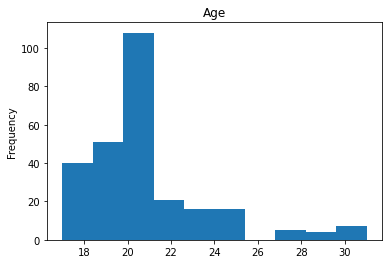

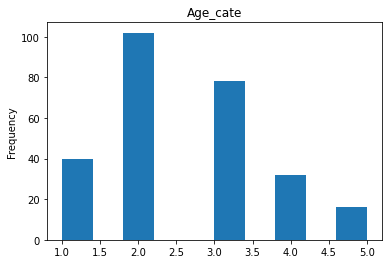

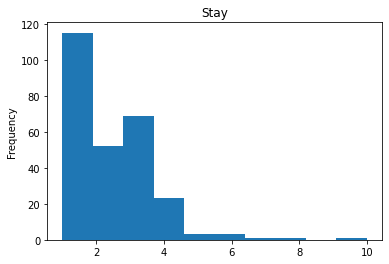

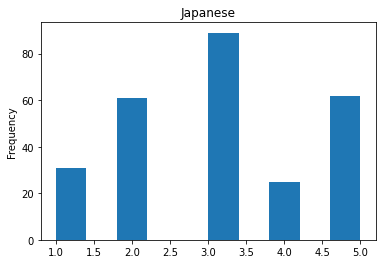

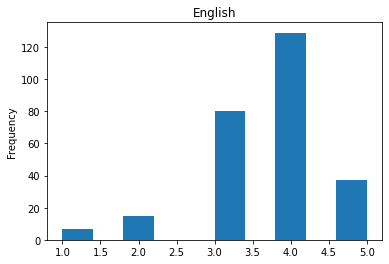

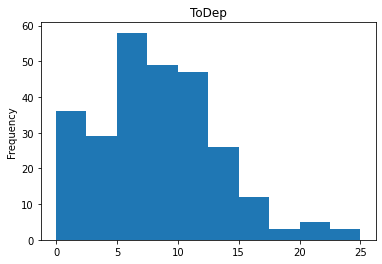

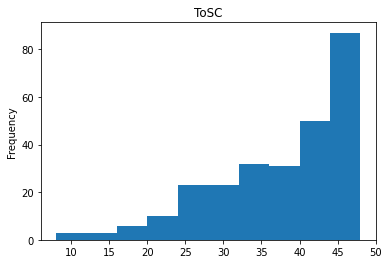

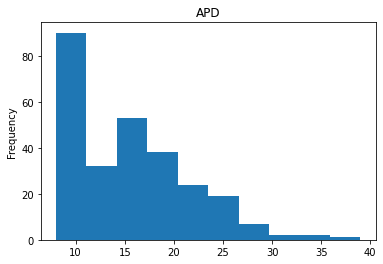

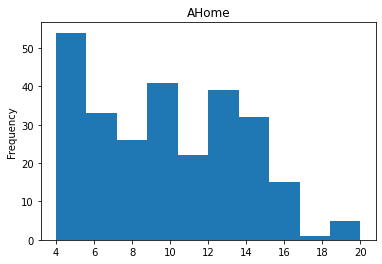

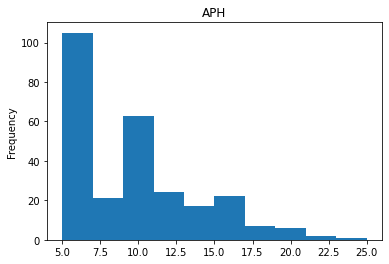

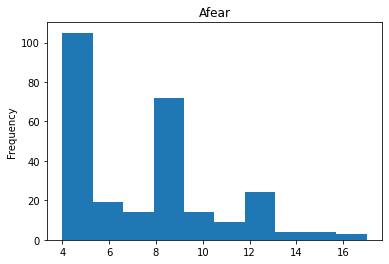

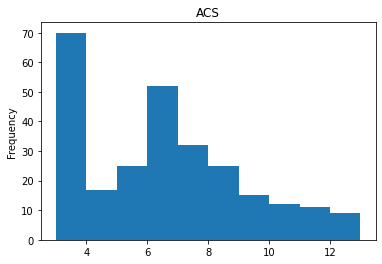

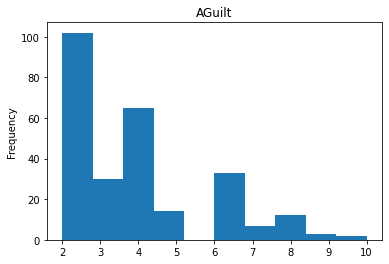

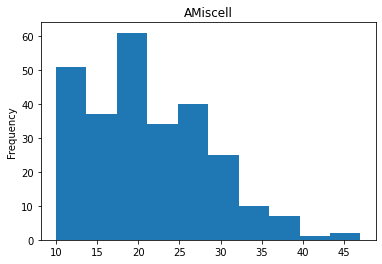

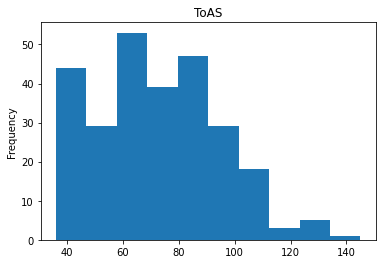

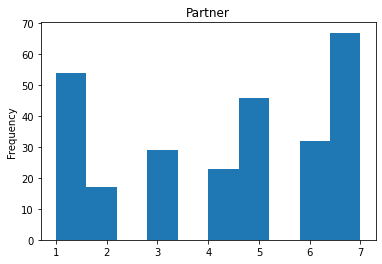

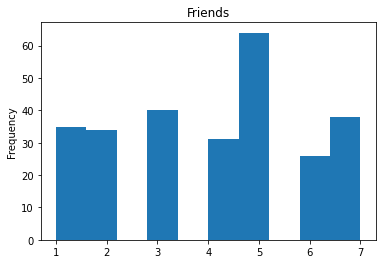

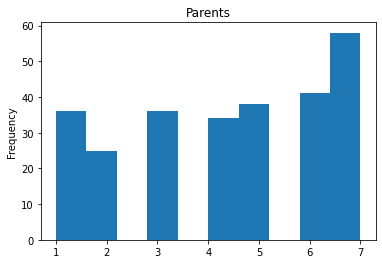

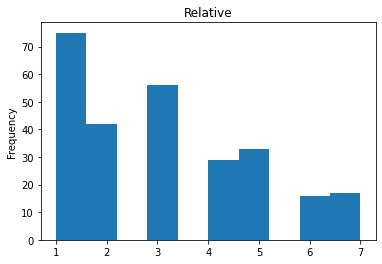

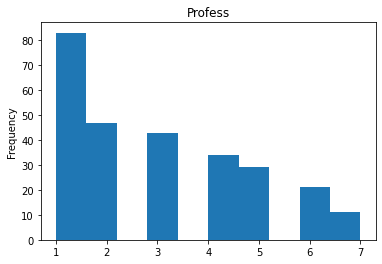

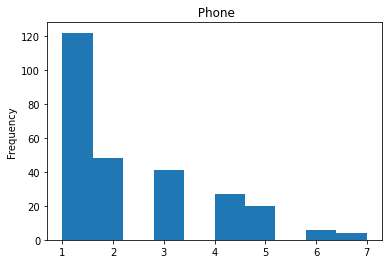

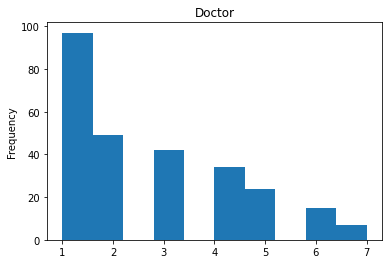

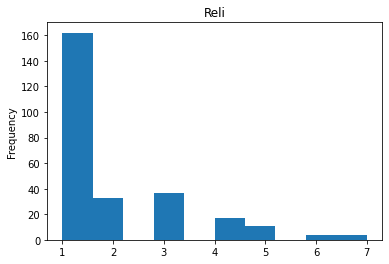

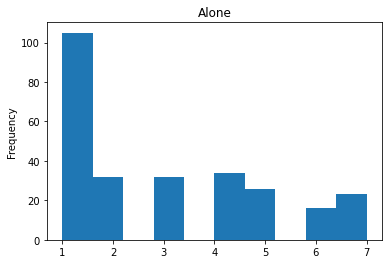

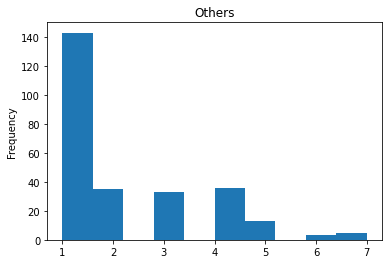

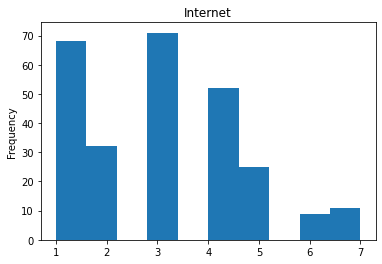

In [62]:
#using subplots
for col in float_df:  
  float_df[col].plot.hist()
  plt.title(col)
  plt.show()

In [ ]:
#univariate analysis
#using subplots
fig = plt.gcf()
fig.set_size_inches(30,30)

for i, col in enumerate(float_df):
  subplot = plt.subplot(6,5, i+1)
  plt.hist(float_df[col])

  plt.title(col)
plt.show()